This heart disease dataset is used to predict whether a patient is likely to develop heart disease based on various medical attributes. It contains 14 columns of clinical data for each patient. The age column represents the patient’s age in years, and sex denotes gender (1 for male, 0 for female). cp indicates chest pain type (0–3), describing the nature and severity of the chest pain. trestbps is the resting blood pressure (in mm Hg), and chol represents serum cholesterol levels (in mg/dl). The fbs column shows whether fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false). restecg gives results of resting electrocardiographic tests, while thalach captures the maximum heart rate achieved during exercise. exang indicates whether the patient experienced exercise-induced angina, and oldpeak refers to ST depression induced by exercise relative to rest. The slope describes the trend of the ST segment during peak exercise (0 = upsloping, 1 = flat, 2 = downsloping). ca records the number of major vessels (0–3) colored by fluoroscopy, and thal describes thalassemia conditions (e.g., normal, fixed defect, reversible defect). The target variable, target, is binary—1 indicates the presence of heart disease, and 0 indicates its absence. This dataset is ideal for binary classification tasks and is widely used in healthcare analytics to support early diagnosis and preventive treatment through machine learning models.

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
df=data.copy()

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.duplicated().value_counts()

,count
True,723
False,302


In [8]:
df.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1005,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
1006,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
1008,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
1009,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
1010,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1012,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [9]:
df.head(233)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
230,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
231,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [10]:
df["age"].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [11]:
# Get the row at index 1011
target_row = df.loc[1021]

# Compare this row to all others
matching_rows = df[df.eq(target_row).all(axis=1)]

# Get the index numbers of the matching rows
matching_indices = matching_rows.index.tolist()

# Remove 1011 itself (optional, if you want only duplicates)
matching_indices = [i for i in matching_indices if i != 1011]

print("Other rows with same data as index 1011:", matching_indices)


Other rows with same data as index 1011: [232, 574, 1021]


In [12]:
df = df.drop_duplicates()


In [13]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
723,False
733,False
739,False
843,False


In [14]:
df.shape

(302, 14)

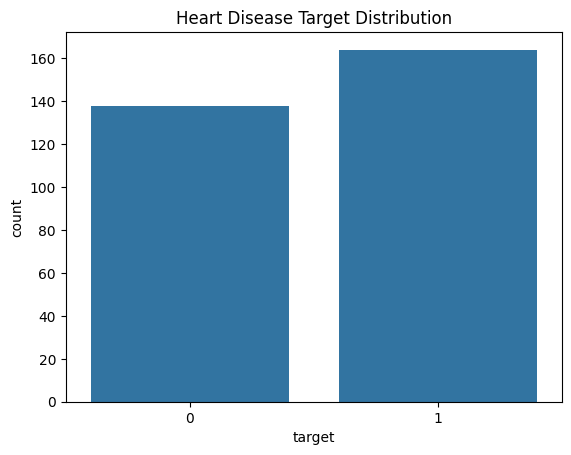

,count
target,
1,164
0,138


In [15]:
# Target distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Target Distribution')
plt.show()
df['target'].value_counts()

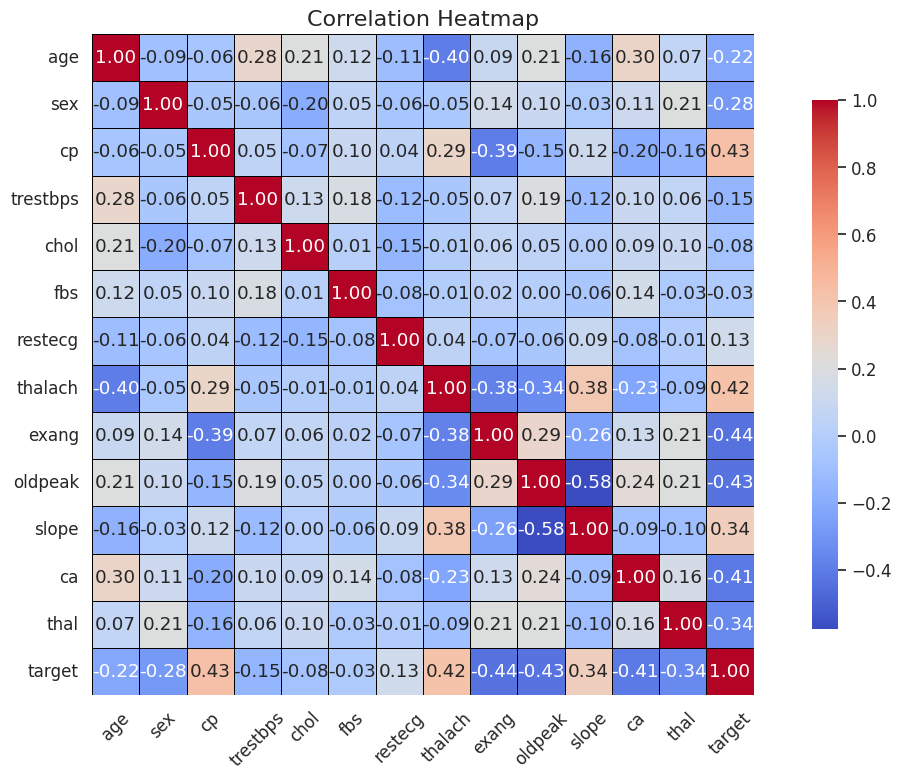

In [16]:
# Set a larger figure size and better formatting
plt.figure(figsize=(12, 8))  # Width x Height in inches
sns.set(font_scale=1.1)      # Make text larger

# Compute correlation matrix
corr = df.corr()

# Plot heatmap with better formatting
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black', square=True, cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

('Accuracy:', 0.7704918032786885)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8360655737704918


In [26]:
import gradio as gr
import numpy as np

def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg,
                          thalach, exang, oldpeak, slope, ca, thal):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                             thalach, exang, oldpeak, slope, ca, thal]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return "💓 Heart Disease Detected" if prediction[0] == 1 else "✅ No Heart Disease"

gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio([0, 1], label="Sex (0: Female, 1: Male)"),
        gr.Radio([0, 1, 2, 3], label="Chest Pain Type (cp)"),
        gr.Number(label="Resting Blood Pressure (trestbps)"),
        gr.Number(label="Cholesterol (chol)"),
        gr.Radio([0, 1], label="Fasting Blood Sugar > 120 mg/dl (fbs)"),
        gr.Radio([0, 1, 2], label="Resting ECG (restecg)"),
        gr.Number(label="Max Heart Rate (thalach)"),
        gr.Radio([0, 1], label="Exercise Induced Angina (exang)"),
        gr.Number(label="ST Depression (oldpeak)"),
        gr.Radio([0, 1, 2], label="Slope of ST Segment (slope)"),
        gr.Number(label="Number of Major Vessels (ca)"),
        gr.Radio([0, 1, 2, 3], label="Thalassemia (thal)")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Heart Disease Predictor"
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://30fd9ebf878dcc9177.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
